# Hệ thống nhận diện cảm xúc khuôn mặt

* Họ tên sinh viên: Đậu Lê Sỹ Toàn
* Mã sinh viên: 1821051035
* Lớp: DCCTKH63B
* Giảng viên hướng dẫn: GS.TS Lê Hồng Anh

# Sử dụng tập dữ liệu FER2013: https://www.kaggle.com/msambare/fer2013

Tập dữ liệu bao gồm 35.887 bức ảnh với tập train 80%, validation 10%, test 10% biểu thị 7 trạng thái cảm xúc:
* Happy - Vui mừng
* Angry - Tức giận
* Sad - Buồn
* Surprise - Ngạc nhiên
* Disgust - Ghê tởm
* Fear - Nỗi sợ
* Neutral - Trung lập

# Sử dụng thuật toán Mạng nơ-ron tích chập (Convolution neural network - CNN)
<img src='sơ đồ.png'>

# Sử dụng các thư viện hỗ trợ như:
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Tensorflow
* Keras
* Sklearn
# Mục tiêu đồ án
1. Sử dụng mạng nơ-ron CNN để nhận dạng cảm xúc khuôn mặt
2. Phân loại chính xác từng hình ảnh khuôn mặt thành một trong bảy loại cảm xúc trên khuôn mặt: tức giận, ghê tởm, sợ hãi, hạnh phúc, buồn bã, ngạc nhiên và trung tính

# 1. Đọc và hiện thị các thuộc tính của tập dữ liệu

In [1]:
# Đọc tập dữ liệu
import pandas as pd
path = "C:/Users/ACER/Downloads/DA/fer2013.csv"
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [2]:
# Xem 5 hàng dữ liệu đầu tiên
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [3]:
# Xem 5 hàng dữ liệu cuối cùng
data.tail(10)

,emotion,pixels,Usage
35877,6,139 143 145 154 159 168 176 181 190 191 195 19...,PrivateTest
35878,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...,PrivateTest
35879,2,0 0 6 16 19 31 47 18 26 19 17 8 15 3 4 2 14 20...,PrivateTest
35880,2,164 172 175 171 172 173 178 181 188 192 197 20...,PrivateTest
35881,0,181 177 176 156 178 144 136 132 122 107 131 16...,PrivateTest
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [4]:
# Kiểm tra hình dạng dữ liệu
data.shape

(35887, 3)

In [5]:
# Kiểm tra dữ liệu sử dụng
# 80% training, 10% validation and 10% test
data.Usage.value_counts()                                                                                                                     

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [6]:
# Khai báo đường dẫn
import os
os.listdir('C:/Users/ACER/Downloads/DA/CNN/images/images/train')

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
# Kiểm tra nhãn dán của các thuộc tính
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Digust,547


# 2. Khai báo thư viện

In [8]:
import numpy as np 
import pandas as pd
#import os

from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Trực quan hoá các thuộc tính

In [9]:
# Khai báo đường dẫn ảnh
picture_size = 48
folder_path = "C:/Users/ACER/Downloads/DA/CNN/images/"

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


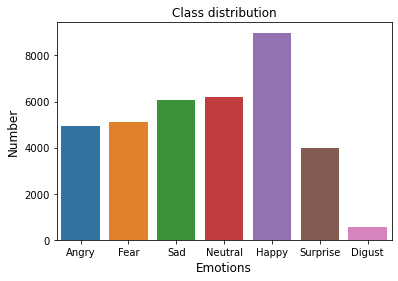

In [10]:
# Vẽ biểu đồ cột phân bố của các lớp
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

C:\Users\ACER\AppData\Local\Temp/ipykernel_12632/3640136765.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([image.astype(np.uint8), emotion])


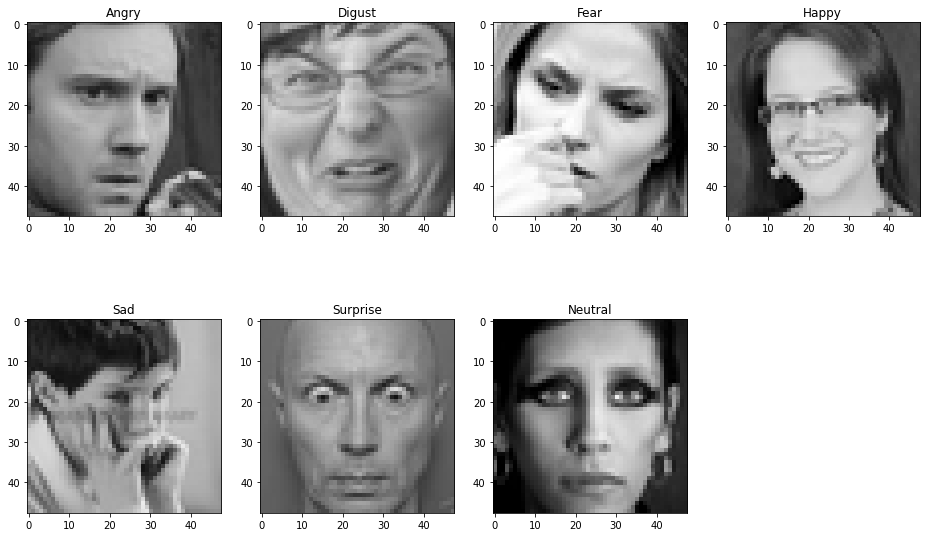

In [11]:
# Trực quan hoá 7 thuộc tính cảm xúc
def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), emotion])

plt.figure(0, figsize=(16,10))
for i in range(1,8):
    face = data[data['emotion'] == i-1].iloc[0]
    img = row2image(face)
    plt.subplot(2,4,i)
    plt.imshow(img[0])
    plt.title(img[1])

plt.show()  

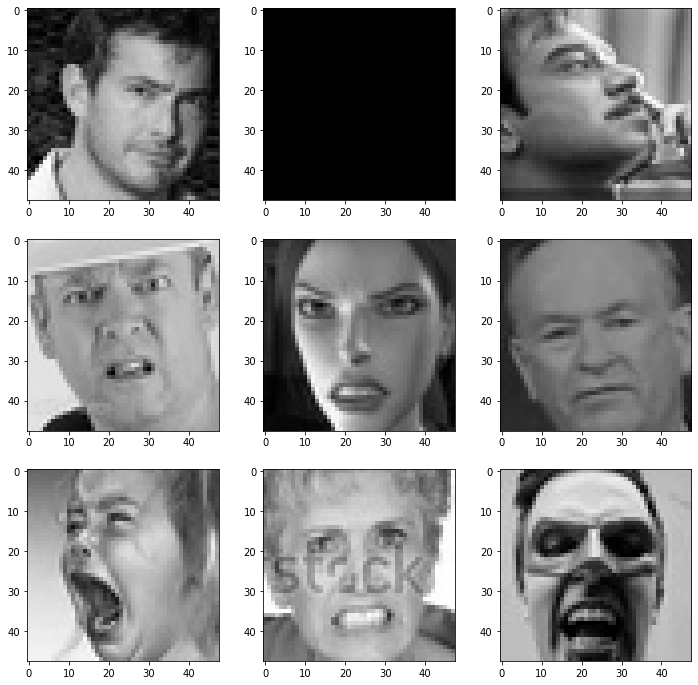

In [12]:
# Trực quan hoá thuộc tính Angry
expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

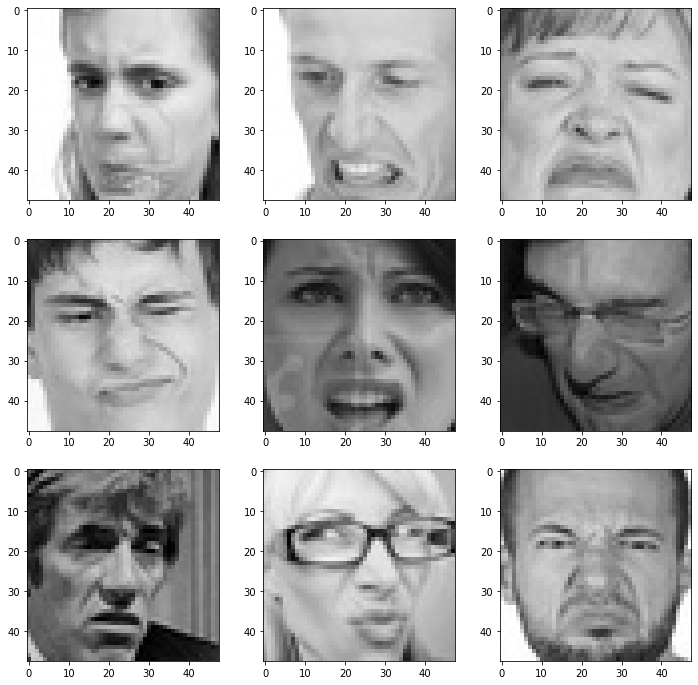

In [13]:
# Trực quan hoá thuộc tính Disgust
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

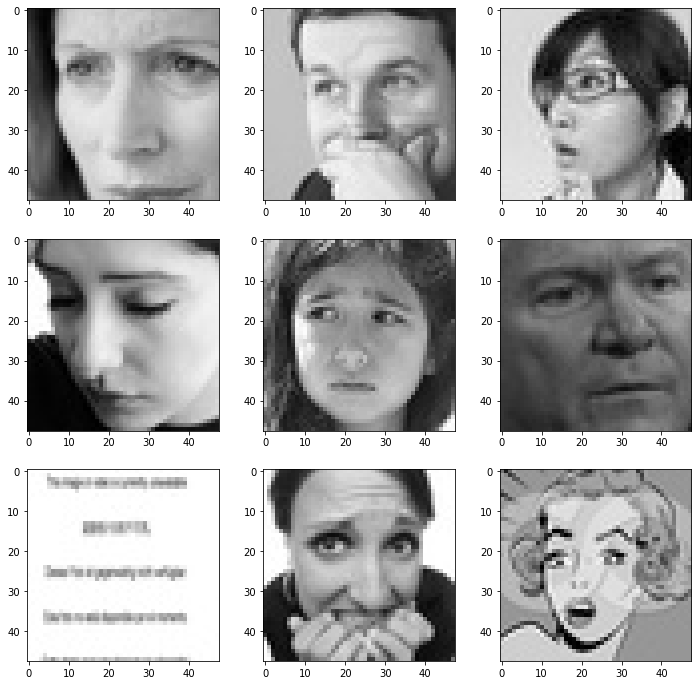

In [14]:
# Trực quan hoá thuộc tính Fear
expression = 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

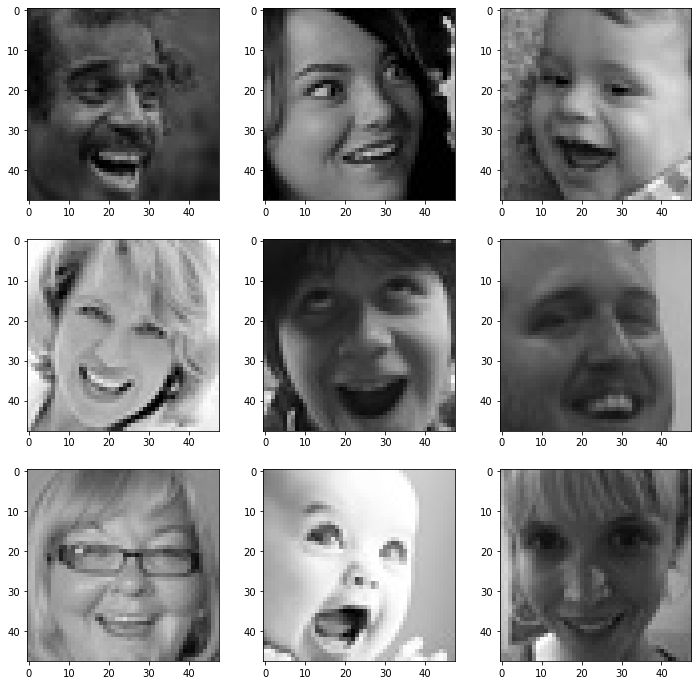

In [15]:
# Trực quan hoá thuộc tính Happy
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

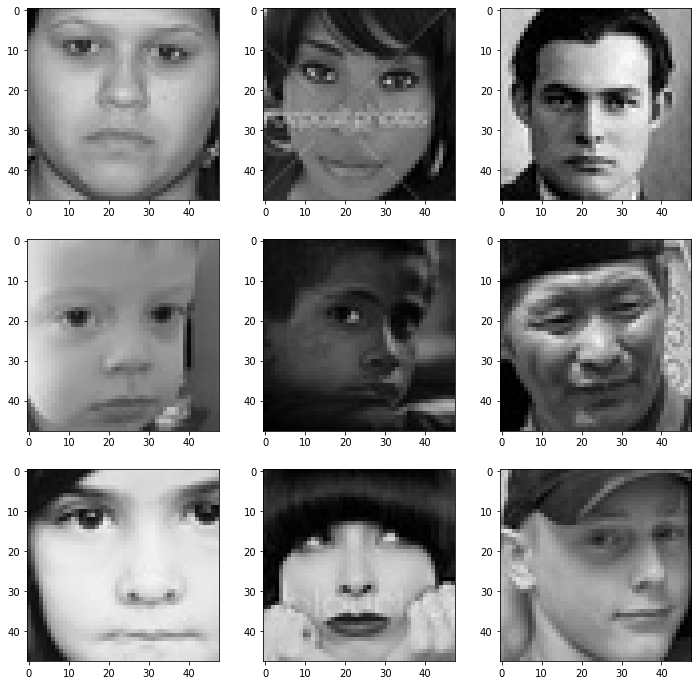

In [16]:
# Trực quan hoá thuộc tính Neutral
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

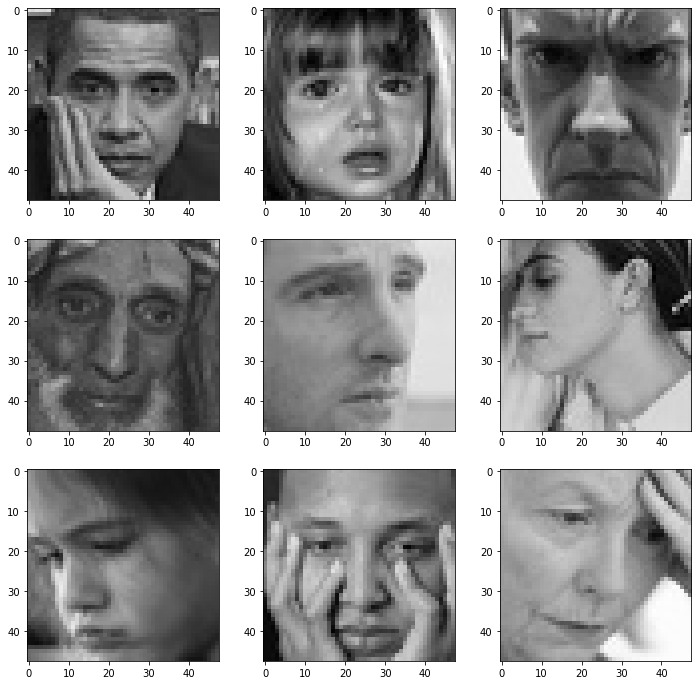

In [17]:
# Trực quan hoá thuộc tính Sad
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

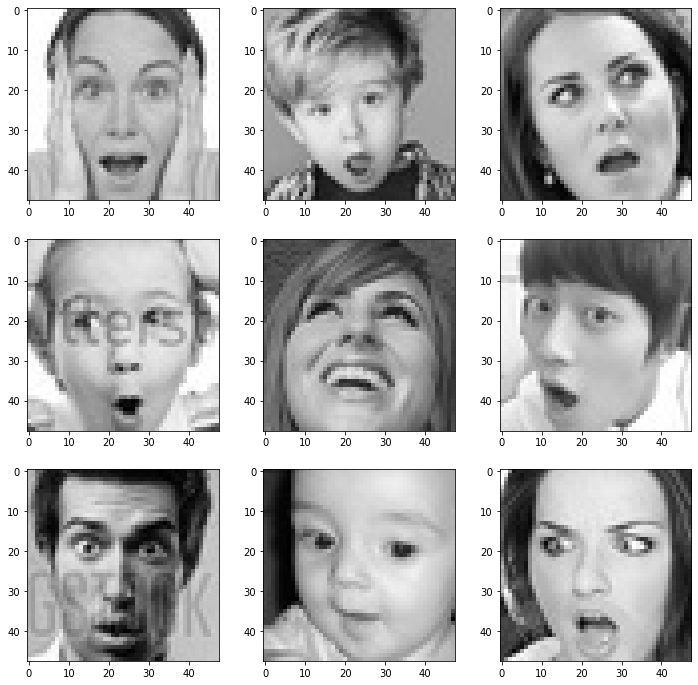

In [18]:
# Trực quan hoá thuộc tính Surprise
expression = 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# 4. Chia tập dữ liệu thành các tập Train - Valudation - Test

# Xử lý trước dữ liệu

1. Chia tập dữ liệu thành 3 phần: training, validation, test
2. Chuyển đổi chuỗi thành danh sách các số nguyên
3. Định hình lại ảnh thành 48x48 và chuẩn hóa hình ảnh thang độ xám với 255.0
4. Thực hiện nhãn mã hóa một nóng, ví dụ: hạng 3 đến [0,0,0,1,0,0,0]

In [19]:
# Chia tập dữ liệu thành các tập Training, Validation, Test
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()
print("train shape: {}, \nvalidation shape: {}, \ntest shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (28709, 3), 
validation shape: (3589, 3), 
test shape: (3589, 3)


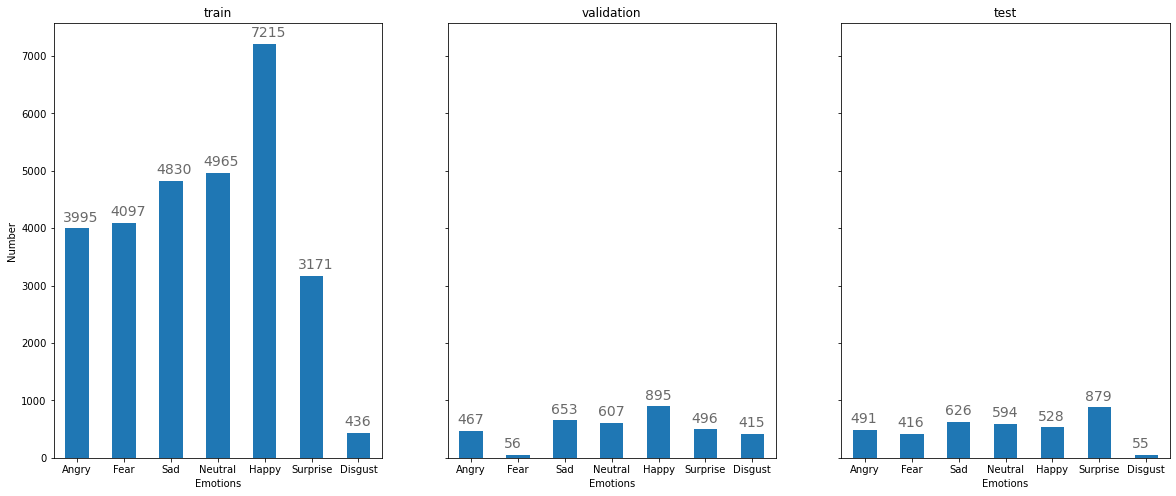

In [20]:
# Sử dụng barlot class để biểu thị mối tương quan giữa các thuộc tính trong các tập dữ liệu Train - Valudation - Test
emotion_labels = ['Angry','Fear','Sad','Neutral','Happy','Surprise','Disgust']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Number")
    axe.set_title(title)
    
    # đặt các nhãn thanh riêng lẻ bằng cách sử dụng danh sách trên
    for i in axe.patches:
        # get_x kéo sang trái hoặc phải; get_height đẩy lên hoặc xuống
        axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='dimgrey',
                    rotation=0)

   
fig, axes = plt.subplots(1,3, figsize=(20,8), sharey=True)
setup_axe(axes[0],data_train,'train')
setup_axe(axes[1],data_val,'validation')
setup_axe(axes[2],data_test,'test')
plt.show()

* Lưu ý rằng hai ô con sau đó chia sẻ cùng một trục y với ô con đầu tiên.

* Kích thước của đoàn tàu, xác nhận, kiểm tra lần lượt là 80%, 10% và 10%.

* Số lượng chính xác của từng lớp trong số các tập dữ liệu này được viết trên đầu thanh trục x của chúng.

# 5. Khởi tạo các tham số dùng trong mô hình

In [21]:
# Khởi tạo các tham số
num_classes = 7 
width, height = 48, 48
num_epochs = 50
batch_size = 64
num_features = 64

In [22]:
# CRNO là viết tắt của Chuyển đổi, Định hình lại, Chuẩn hóa, Mã hóa một lần
# (i) chuyển đổi chuỗi thành danh sách các số nguyên
# (ii) định hình lại và chuẩn hóa hình ảnh thang độ xám với 255.0
# (iii) nhãn mã hóa một nóng, ví dụ: hạng 3 đến [0,0,0,1,0,0,0]

def CRNO(df, dataName):
    df['pixels'] = df['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])
    data_X = np.array(df['pixels'].tolist(), dtype='float32').reshape(-1,width, height,1)/255.0   
    data_Y = to_categorical(df['emotion'], num_classes)  
    print(dataName, "_X shape: {}, ", dataName, "_Y shape: {}".format(data_X.shape, data_Y.shape))
    return data_X, data_Y

    
train_X, train_Y = CRNO(data_train, "train") #training data
val_X, val_Y     = CRNO(data_val, "val") #validation data
test_X, test_Y   = CRNO(data_test, "test") #test data

train _X shape: {},  train _Y shape: (28709, 48, 48, 1)
val _X shape: {},  val _Y shape: (3589, 48, 48, 1)
test _X shape: {},  test _Y shape: (3589, 48, 48, 1)


# 6. Xây dựng mô hình CNN

Chú thích:
* conv(convert): chuyển đổi
* BN(Batch-Normalization): chuẩn hoá hàng loạt
* Activation: Kích hoạt mô hình
* MaxPooling: Tổng hợp tối đa
* Output layer: Lớp đầu ra

# Kiến trúc  CNN

* Conv -> BN -> Activation -> Conv -> BN -> Activation -> MaxPooling
* Conv -> BN -> Activation -> Conv -> BN -> Activation -> MaxPooling
* Conv -> BN -> Activation -> Conv -> BN -> Activation -> MaxPooling
* Flatten
* Dense -> BN -> Activation
* Dense -> BN -> Activation
* Dense -> BN -> Activation
* Output layer

In [23]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [24]:
# Xây dựng mô hình
model = Sequential()

#module 1
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), input_shape=(width, height, 1), data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 2
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 3
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#flatten
model.add(Flatten())

#dense 1
model.add(Dense(2*2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 2
model.add(Dense(2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 3
model.add(Dense(2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#output layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 256)       2560      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 256)       1024      
_________________________________________________________________
activation (Activation)      (None, 46, 46, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 256)       0

C:\Users\ACER\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [25]:
# Bộ tạo dữ liệu
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)


es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

In [26]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [27]:
# Training model
history = model.fit_generator(data_generator.flow(train_X, train_Y, batch_size),
                                steps_per_epoch=len(train_X) / batch_size,
                                epochs=num_epochs,
                                verbose=2, 
                                callbacks = [es],
                                validation_data=(val_X, val_Y))

C:\Users\ACER\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
224/224 - 167s - loss: 1.7327 - accuracy: 0.3114 - val_loss: 1.9007 - val_accuracy: 0.2494
Epoch 2/50
224/224 - 160s - loss: 1.4556 - accuracy: 0.4347 - val_loss: 1.6974 - val_accuracy: 0.3123
Epoch 3/50
224/224 - 161s - loss: 1.2933 - accuracy: 0.5055 - val_loss: 1.4115 - val_accuracy: 0.4609
Epoch 4/50
224/224 - 161s - loss: 1.1980 - accuracy: 0.5419 - val_loss: 1.3810 - val_accuracy: 0.4918
Epoch 5/50
224/224 - 161s - loss: 1.1402 - accuracy: 0.5668 - val_loss: 1.3416 - val_accuracy: 0.4798
Epoch 6/50
224/224 - 161s - loss: 1.0946 - accuracy: 0.5859 - val_loss: 1.2261 - val_accuracy: 0.5464
Epoch 7/50
224/224 - 161s - loss: 1.0524 - accuracy: 0.6007 - val_loss: 1.3669 - val_accuracy: 0.5274
Epoch 8/50
224/224 - 161s - loss: 1.0355 - accuracy: 0.6081 - val_loss: 1.2807 - val_accuracy: 0.5333
Epoch 9/50
224/224 - 161s - loss: 1.0039 - accuracy: 0.6206 - val_loss: 1.0636 - val_accuracy: 0.6055
Epoch 10/50
224/224 - 161s - loss: 0.9847 - accuracy: 0.6276 - val_loss: 1.1449 - 

In [28]:
# Lưu mô hình để sử dụng sau này
fer_json = model.to_json()
with open("C:/Users/ACER/Downloads/DA/fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save("C:/Users/ACER/Downloads/DA/CNN/images/model.h5")
#model.save_weights("C:/Users/ACER/Downloads/DA/CNN/images/model.h5")

# 7. Trực quan hoá hiệu suất đào tạo

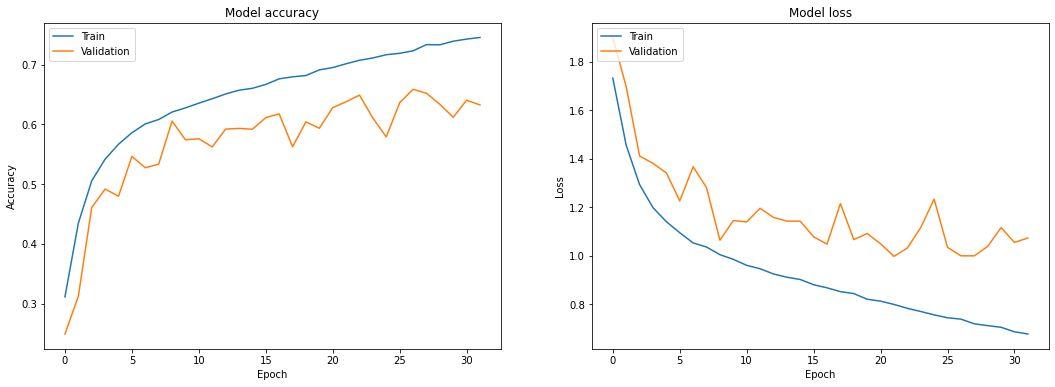

In [29]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Đào tạo và trực quan giá trị chính xác
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Đào tạo và trực quan giá trị sai
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 8. Đánh giá hiệu suất

In [30]:
# Độ chính xác trên tập train
test_true1 = np.argmax(train_Y, axis=1)
test_pred1 = np.argmax(model.predict(train_X), axis=1)
print("CNN Model Accuracy on Train set: {:0.4f}".format(accuracy_score(test_true1, test_pred1)))

CNN Model Accuracy on Train set: 0.7295


In [31]:
# Độ chính xác trên tập test
test_true = np.argmax(test_Y, axis=1)
test_pred = np.argmax(model.predict(test_X), axis=1)
print("CNN Model Accuracy on test set: {:0.4f}".format(accuracy_score(test_true, test_pred)))

CNN Model Accuracy on test set: 0.6450


# 9. Phân tích thêm bằng ma trận Confusion Matrix

In [32]:
# Xây dựng ma trận
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
     Hàm này in và vẽ sơ đồ ma trận nhầm lẫn.
     Chuẩn hóa có thể được áp dụng bằng cách đặt `normalize = True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_true, y_pred)
    # Chỉ sử dụng các nhãn xuất hiện trong dữ liệu
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # hiển thị tất cả các ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... gắn nhãn bằng các mục danh sách tương ứng
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Xoay các nhãn đánh dấu và đặt căn chỉnh của chúng
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Lặp lại các thứ nguyên dữ liệu và tạo chú thích văn bản
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

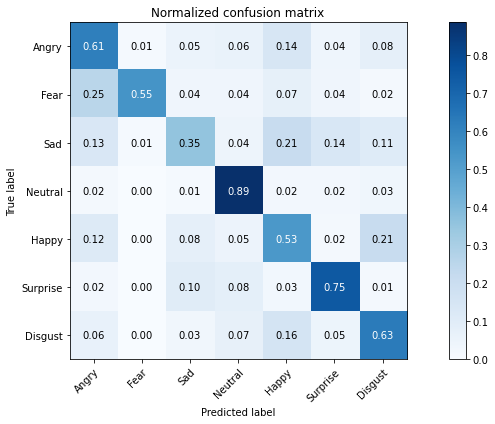

In [33]:
# Lập đồ thị ma trận nhầm lẫn chuẩn hóa
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

# 10. Chạy thử mô hình thực nghiệm

In [34]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(r'C:/Users/ACER/Downloads/DA/CNN/images/haarcascade_frontalface_default.xml')
classifier =load_model(r'C:/Users/ACER/Downloads/DA/CNN/images/model.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()